# Task 3 - Work Through Chapter 15
## Classification with k-Nearest Neighbors and the Digits Dataset (Part 1)

In [154]:
#load dataset
from sklearn.datasets import load_digits
digits = load_digits()

In [155]:
# display description of the dataset
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [156]:
#check sample and target sizes
digits.target[::100]


array([0, 4, 1, 7, 4, 8, 2, 2, 4, 4, 1, 9, 7, 3, 2, 1, 2, 5])

In [157]:
digits.data.shape

(1797, 64)

In [158]:
digits.target.shape

(1797,)

In [159]:
#show two dimensional array of the sample image at index 10
digits.images[10]

array([[ 0.,  0.,  1.,  9., 15., 11.,  0.,  0.],
       [ 0.,  0., 11., 16.,  8., 14.,  6.,  0.],
       [ 0.,  2., 16., 10.,  0.,  9.,  9.,  0.],
       [ 0.,  1., 16.,  4.,  0.,  8.,  8.,  0.],
       [ 0.,  4., 16.,  4.,  0.,  8.,  8.,  0.],
       [ 0.,  1., 16.,  5.,  1., 11.,  3.,  0.],
       [ 0.,  0., 12., 12., 10., 10.,  0.,  0.],
       [ 0.,  0.,  1., 10., 13.,  3.,  0.,  0.]])

In [160]:
# use load_digits to flatten two-dimensional array into one-dimensional
digits.data[10]

array([ 0.,  0.,  1.,  9., 15., 11.,  0.,  0.,  0.,  0., 11., 16.,  8.,
       14.,  6.,  0.,  0.,  2., 16., 10.,  0.,  9.,  9.,  0.,  0.,  1.,
       16.,  4.,  0.,  8.,  8.,  0.,  0.,  4., 16.,  4.,  0.,  8.,  8.,
        0.,  0.,  1., 16.,  5.,  1., 11.,  3.,  0.,  0.,  0., 12., 12.,
       10., 10.,  0.,  0.,  0.,  0.,  1., 10., 13.,  3.,  0.,  0.])

In [161]:
# Visualize the Data-Create the Diagram (with 4 rows and 6 coulumns)
import matplotlib.pyplot as plt


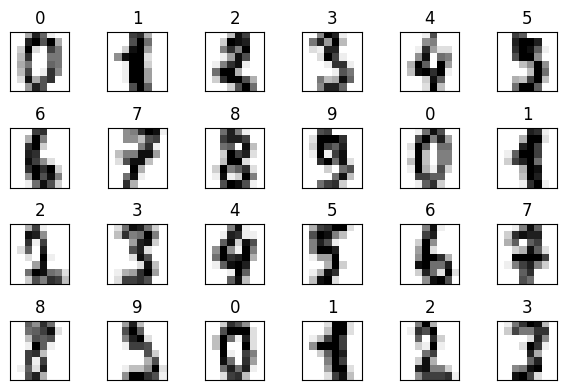

In [162]:
# Visualize the Data-Create the Diagram (with 4 rows and 6 coulumns)
import matplotlib.pyplot as plt
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(6, 4))

#remove x and y axis labels and display image
for item in zip(axes.ravel(), digits.images, digits.target):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([]) # remove x-axis tick marks
    axes.set_yticks([]) # remove y-axis tick marks
    axes.set_title(target)
plt.tight_layout()


In [163]:
#  Split the Data for Training and Testing 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, random_state=11)

In [164]:
#Look at set sizes for training and testing
X_train.shape


(1347, 64)

In [165]:
X_test.shape

(450, 64)

In [166]:
#create KNeighborsClassifier estimator object: 
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()


In [167]:
#invoke fit method
knn.fit(X=X_train, y=y_train)

KNeighborsClassifier()

In [168]:
# Call the estimator’s predict method with X_test as an argument 
predicted = knn.predict(X=X_test)
expected = y_test

In [169]:
#predicted digits for first 20 samples
predicted[:20]

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 5, 6])

In [170]:
#expected digits for the first 20 samples
expected[:20]

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 3, 6])

In [171]:
#the 5 and 3 at index 18 don't match above
#use list comprehension to locate all the incorrect predictions where predicted and expected won't match
wrong = [(p, e) for (p, e) in zip(predicted, expected) if p != e]
wrong

[(5, 3),
 (8, 9),
 (4, 9),
 (7, 3),
 (7, 4),
 (2, 8),
 (9, 8),
 (3, 8),
 (3, 8),
 (1, 8)]